In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [4]:
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan 2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan 2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan 2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan 2020-01-04          0.0        0.0   
...        ...       ...            ...        ...          ...        ...   
31489      NaN       NaN  International 2020-02-28        705.0        0.0   
31490      NaN       NaN  International 2020-02-29        705.0        0.0   
31491      NaN       NaN  International 2020-03-01        705.0        0.0   
31492      NaN       NaN  International 2020-03-02        705.0        0.0   
31493      NaN       NaN  International 2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
0               0.0         0.0                      0.0   
1               0.0         0.0                      0.0   
2               0.0         0.0                      0.0   
3               0.0         0.0                      0.0   
4               0.0         0.0                      0.0   
...             ...         ...                      ...   
31489           4.0         0.0                      NaN   
31490           6.0         2.0                      NaN   
31491           6.0         0.0                      NaN   
31492           6.0         0.0                      NaN   
31493           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                        0.0  ...          1.337        1803.987   
1                        0.0  ...          1.337        1803.987   
2                        0.0  ...          1.337        1803.987   
3                        0.0  ...          1.337        1803.987   
4                        0.0  ...          1.337        1803.987   
...                      ...  ...            ...             ...   
31489                    NaN  ...            NaN             NaN   
31490                    NaN  ...            NaN             NaN   
31491                    NaN  ...            NaN             NaN   
31492                    NaN  ...            NaN             NaN   
31493                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  NaN                597.029                 9.59   
1                  NaN                597.029                 9.59   
2                  NaN                597.029                 9.59   
3                  NaN                597.029                 9.59   
4                  NaN                597.029                 9.59   
...                ...                    ...                  ...   
31489              NaN                    NaN                  NaN   
31490              NaN                    NaN                  NaN   
31491              NaN                    NaN                  NaN   
31492              NaN                    NaN                  NaN   
31493              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
0                 NaN           NaN                  37.746   
1                 NaN           NaN                  37.746   
2                 NaN           NaN                  37.746   
3                 NaN           NaN                  37.746   
4                 NaN           NaN                  37.746   
...               ...           ...                     ...   
31489             NaN           NaN                     NaN   
31490             NaN           NaN                     NaN   
31491             NaN           NaN                     NaN   
31492             NaN           NaN                     NaN 

### Start date to analysis: 2020-03-01

In [5]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[(df['date'] > '2020-03-01')]
df = df.sort_values(by=['total_cases'], ascending=True)
df

date              location  total_cases  total_deaths  new_cases  \
19779 2020-03-17               Myanmar          0.0           0.0        0.0   
62    2020-03-02           Afghanistan          1.0           0.0        0.0   
7957  2020-03-20              Djibouti          1.0           0.0        0.0   
7958  2020-03-21              Djibouti          1.0           0.0        0.0   
7959  2020-03-22              Djibouti          1.0           0.0        0.0   
...          ...                   ...          ...           ...        ...   
29427 2020-03-14  United Arab Emirates          NaN           NaN        NaN   
30653 2020-03-03               Vietnam          NaN           NaN        NaN   
30654 2020-03-04               Vietnam          NaN           NaN        NaN   
30655 2020-03-05               Vietnam          NaN           NaN        NaN   
30656 2020-03-06               Vietnam          NaN           NaN        NaN   

       new_deaths  
19779         0.0  
62            0.0  
7957          0.0  
7958          0.0  
7959          0.0  
...           ...  
29427         NaN  
30653         NaN  
30654         NaN  
30655         NaN  
30656         NaN  

[27163 rows x 6 columns]

# 1. Number of cases and deaths in World

In [6]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld.reset_index(drop=True, inplace=True)
#dfWorld = dfWorld.loc[:,['date','total_cases','total_deaths']]
dfWorld

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-02    World      89136.0        3046.0     2094.0        67.0
1   2020-03-03    World      90969.0        3118.0     1833.0        72.0
2   2020-03-04    World      93250.0        3202.0     2281.0        84.0
3   2020-03-05    World      95566.0        3282.0     2316.0        80.0
4   2020-03-06    World      98599.0        3384.0     3033.0       102.0
..         ...      ...          ...           ...        ...         ...
136 2020-07-16    World   13532281.0      583897.0   231721.0      5576.0
137 2020-07-17    World   13790342.0      589700.0   258061.0      5803.0
138 2020-07-18    World   14044872.0      597148.0   254530.0      7448.0
139 2020-07-19    World   14269028.0      602037.0   224156.0      4889.0
140 2020-07-20    World   14476729.0      605979.0   207701.0      3942.0

[141 rows x 6 columns]

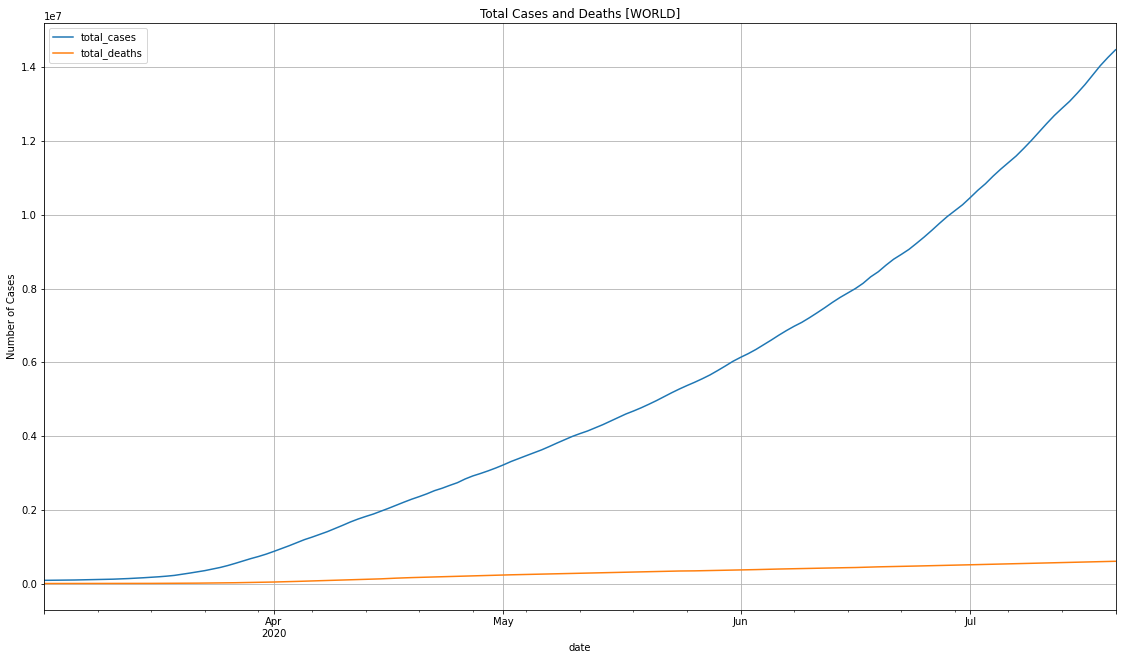

In [52]:
dfWorld.plot(x='date', y=['total_cases', 'total_deaths'], figsize=(19.20,10.80))
plt.title('Total Cases and Deaths [WORLD]')
plt.ylabel('Number of Cases')
plt.grid()

### Obs.: Zoom enabled

In [7]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.total_cases, name='Total Cases'))
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.total_deaths, name='Total Deaths'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16), 
                       title='Total Cases and Deaths [WORLD]')

figWorld.show()

In [8]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.new_deaths, name='New Deaths'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(title='New Deaths [WORLD]')

figWorld.show()

In [9]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.new_cases, name='New Cases'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(title='New Cases [WORLD]')

figWorld.show()

# 2. Selecting Countries by the following conditions: 50k total cases and 35k deaths.

In [10]:
mainCountries = df[
        (df['total_cases'] > 50000) & 
        (df['total_deaths'] > 35000) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries

date        location  total_cases  total_deaths  new_cases  \
29961 2020-07-20   United_States    3773260.0      140534.0    61796.0   
29960 2020-07-19   United_States    3711464.0      140119.0    63749.0   
29959 2020-07-18   United_States    3647715.0      139266.0    71494.0   
29958 2020-07-17   United_States    3576221.0      138358.0    76930.0   
29957 2020-07-16   United_States    3499291.0      137419.0    67717.0   
...          ...             ...          ...           ...        ...   
29698 2020-05-21  United_Kingdom     248293.0       35704.0     -525.0   
14690 2020-07-20           Italy     244434.0       35045.0      218.0   
14689 2020-07-19           Italy     244216.0       35042.0      249.0   
14688 2020-07-18           Italy     243967.0       35028.0      231.0   
14687 2020-07-17           Italy     243736.0       35017.0      230.0   

       new_deaths  
29961       415.0  
29960       853.0  
29959       908.0  
29958       939.0  
29957       953.0  
...           ...  
29698       363.0  
14690         3.0  
14689        14.0  
14688        11.0  
14687        20.0  

[213 rows x 6 columns]

In [11]:
myDate = df['date'].astype(str).unique()

In [12]:
dfCountry = mainCountries['location'].astype(str).unique()
dfCountry

array(['United_States', 'Brazil', 'Mexico', 'United_Kingdom', 'Italy'],
      dtype=object)

In [13]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

In [14]:
newDf_list=[]
for index in range(len(dfCountry)):  
    newDf = [d[index]['new_deaths']]
    header = [dfCountry[index]]
    newDf = pd.concat(newDf, axis=1, keys=header)
    newDf_list.append(newDf)

## New deaths per day in the main countries

In [48]:
dfConcat = []
for index in range(len(dfCountry)):
    dfConcat = pd.concat(newDf_list, axis=1)
dfConcat.insert(0, 'date', myDate)
dfConcat.sort_values(by=['date'], ascending=False)

date  United_States  Brazil  Mexico  United_Kingdom  Italy
110  2020-07-20          678.0  1206.0   602.0           286.0   66.0
128  2020-07-19         1174.0  1254.0   579.0           173.0   30.0
112  2020-07-18          256.0   641.0   473.0            11.0   24.0
113  2020-07-17          427.0   654.0   648.0           245.0   23.0
114  2020-07-16          826.0  1374.0   741.0           138.0   18.0
..          ...            ...     ...     ...             ...    ...
33   2020-03-06         1104.0    60.0    40.0           714.0  764.0
49   2020-03-05         1772.0   115.0    83.0           498.0  433.0
11   2020-03-04           10.0     0.0     2.0             2.0  189.0
26   2020-03-03          411.0    15.0    19.0           284.0  971.0
1    2020-03-02            4.0     0.0     0.0             0.0   17.0

[141 rows x 6 columns]

In [45]:
toGo = dfConcat.sort_values(by='date', ascending=False)
toGo = toGo.set_index('date')

### Obs.: zoom enabled

In [47]:
figTest = go.Figure()
for index in range(len(dfCountry)):
    figTest.add_trace(go.Scatter(x=toGo.index, y=toGo.iloc[:,index], name=dfCountry[index]))

figTest.update_traces(mode="markers+lines")
figTest.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", 
                                  x=0.01, traceorder='reversed', font_size=15),
                                  title='New deaths per day in the main countries')

figTest.show()

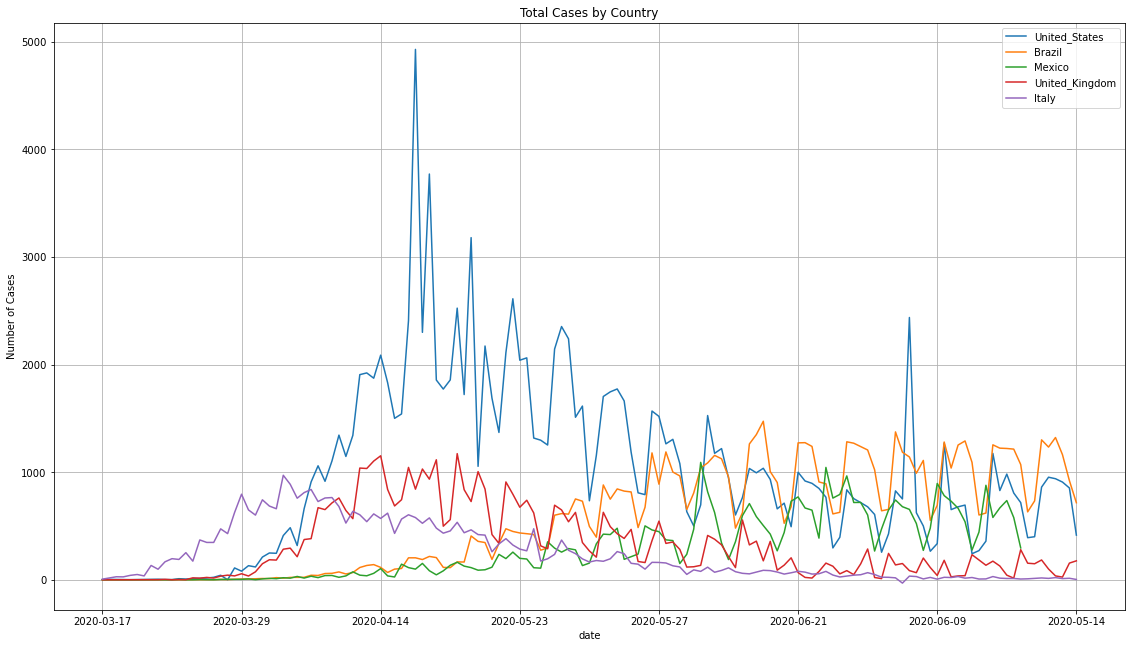

In [49]:
dfConcat.plot(x='date', y=dfCountry, figsize=(19.20,10.80))
plt.title('Total Cases by Country')
plt.ylabel('Number of Cases')
plt.grid()

### New deaths per day by country

In [50]:
fig = go.Figure()
for index in range(len(dfCountry)):
    fig = go.Figure(data=go.Scatter(x=toGo.index, y=toGo.iloc[:,index], name=dfCountry[index]))
    fig.update_traces(mode="markers+lines")
    fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", 
                                  x=0.01, traceorder='reversed', font_size=15), title=dfCountry[index])
    fig.show()

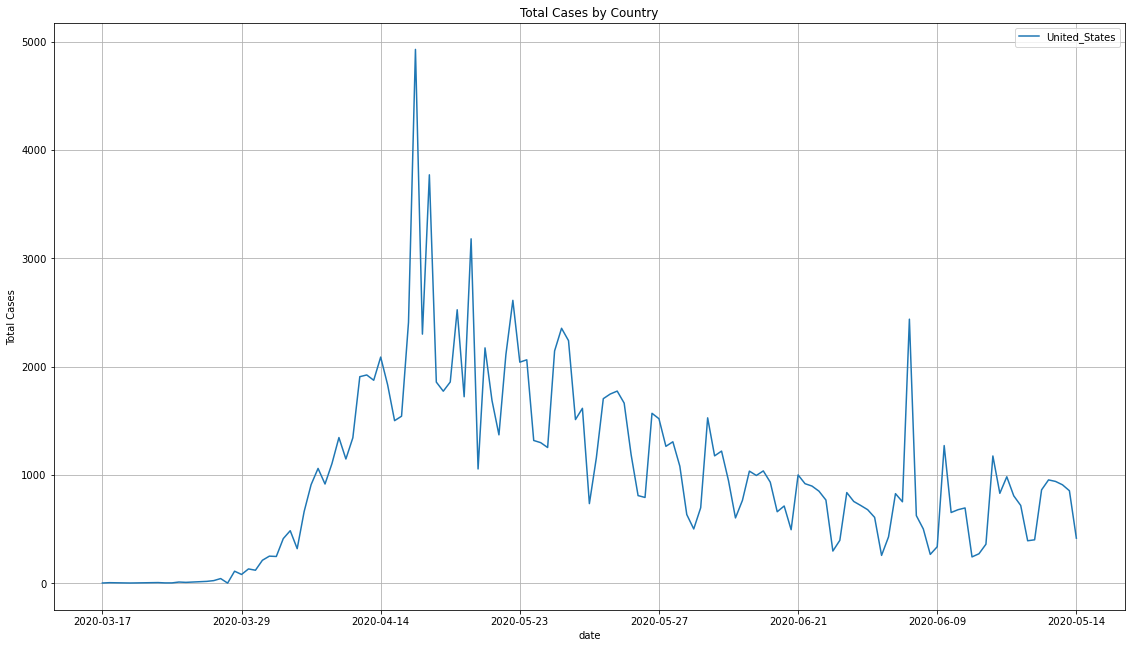

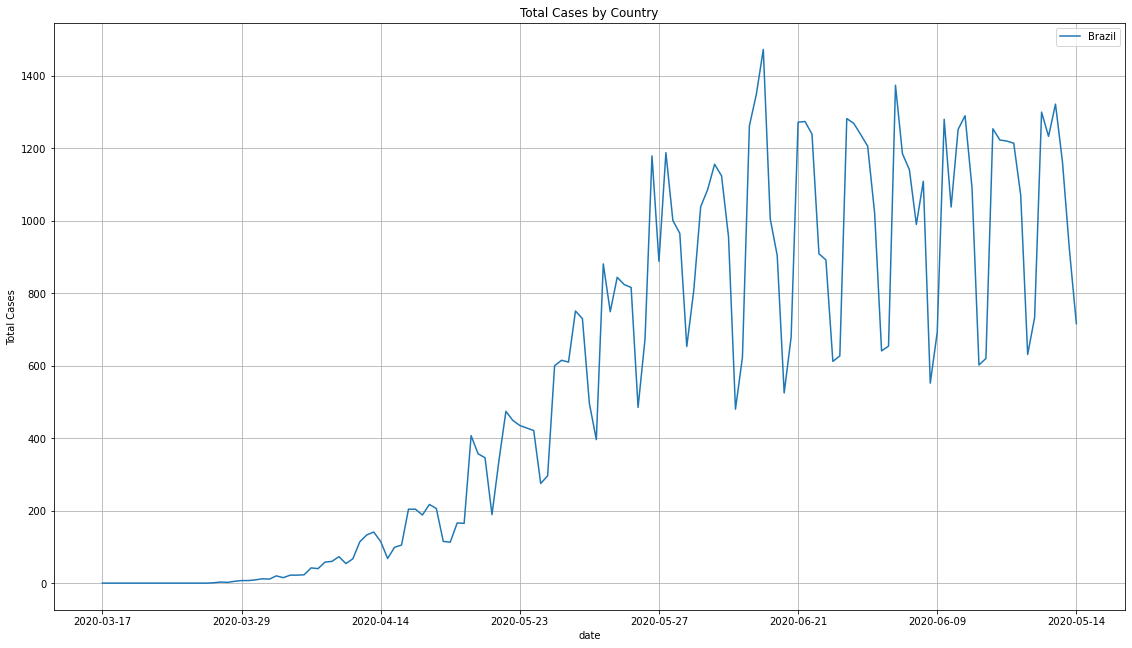

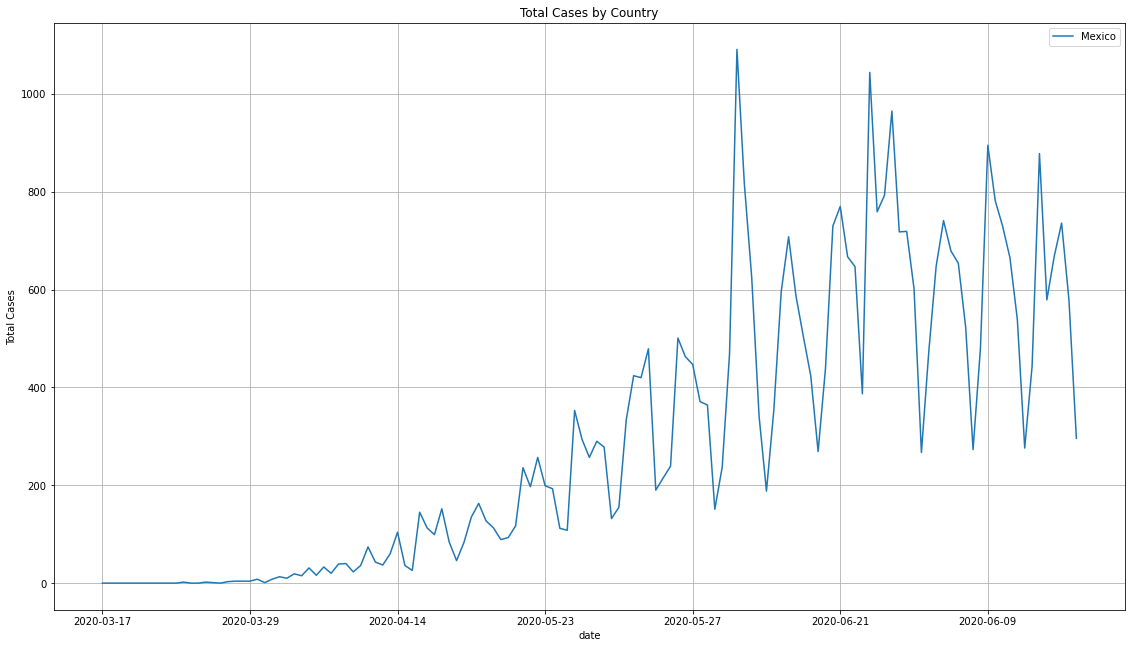

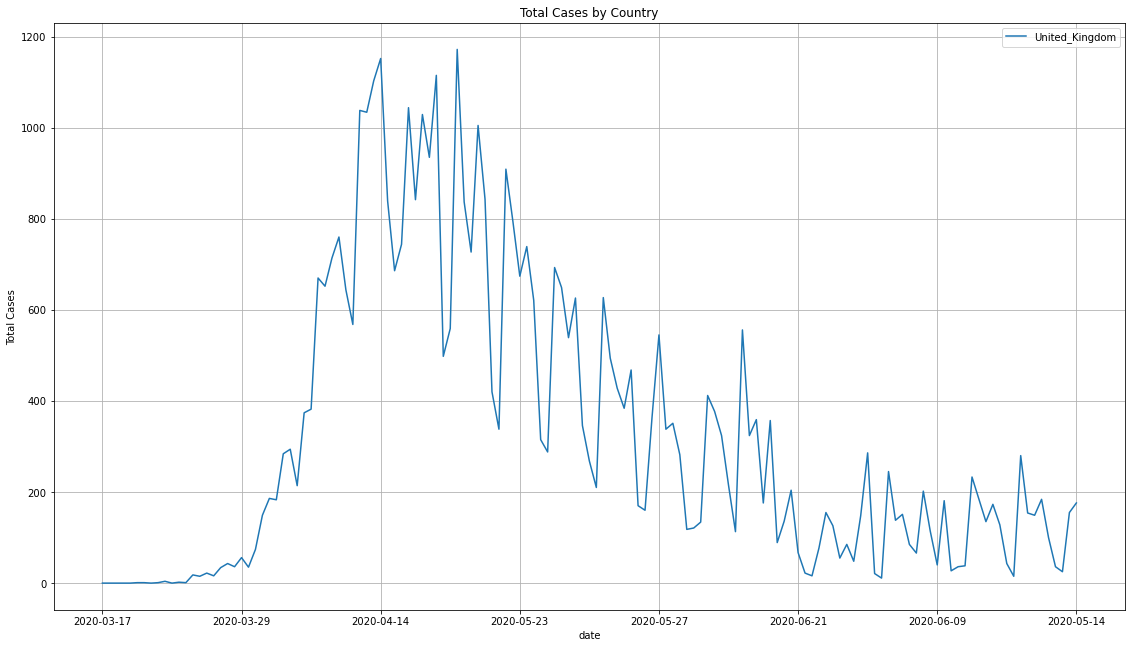

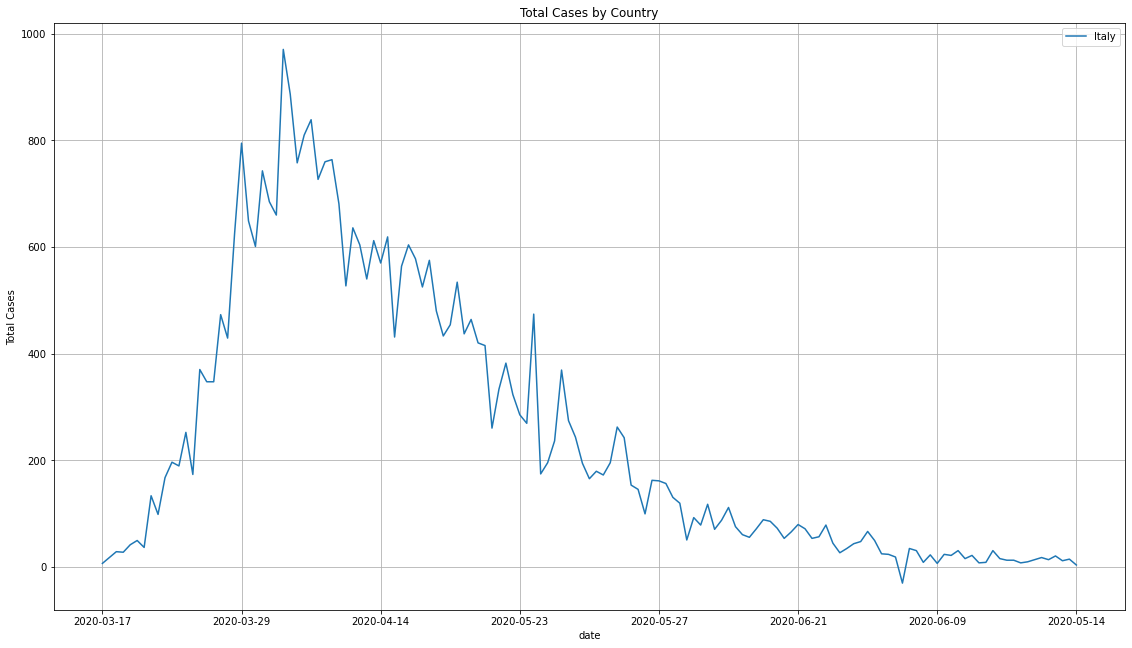

In [20]:
for index in range(len(dfCountry)):
    dfConcat.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
    plt.title('Total Cases by Country')
    plt.ylabel('Total Cases')
    plt.grid()

### Brazil Cases

In [21]:
dfBrazil = df[df['location'] == 'Brazil']
dfBrazil = dfBrazil.sort_values(by='date', ascending=True)
dfBrazil.reset_index(drop=True, inplace=True)
dfBrazil

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-02   Brazil          2.0           0.0        0.0         0.0
1   2020-03-03   Brazil          2.0           0.0        0.0         0.0
2   2020-03-04   Brazil          2.0           0.0        0.0         0.0
3   2020-03-05   Brazil          3.0           0.0        1.0         0.0
4   2020-03-06   Brazil          8.0           0.0        5.0         0.0
..         ...      ...          ...           ...        ...         ...
136 2020-07-16   Brazil    1966748.0       75366.0    39924.0      1233.0
137 2020-07-17   Brazil    2012151.0       76688.0    45403.0      1322.0
138 2020-07-18   Brazil    2046328.0       77851.0    34177.0      1163.0
139 2020-07-19   Brazil    2074860.0       78772.0    28532.0       921.0
140 2020-07-20   Brazil    2098389.0       79488.0    23529.0       716.0

[141 rows x 6 columns]

In [22]:
fig_1 = go.Figure(data=go.Scatter(x=dfBrazil.date, y=dfBrazil.new_deaths, mode='lines+markers'))
fig_1.update_layout(title='New Deaths [BRAZIL]', yaxis_title='Number of new deaths', 
                    xaxis_title='Date',xaxis_tickangle=315)
fig_1.show()

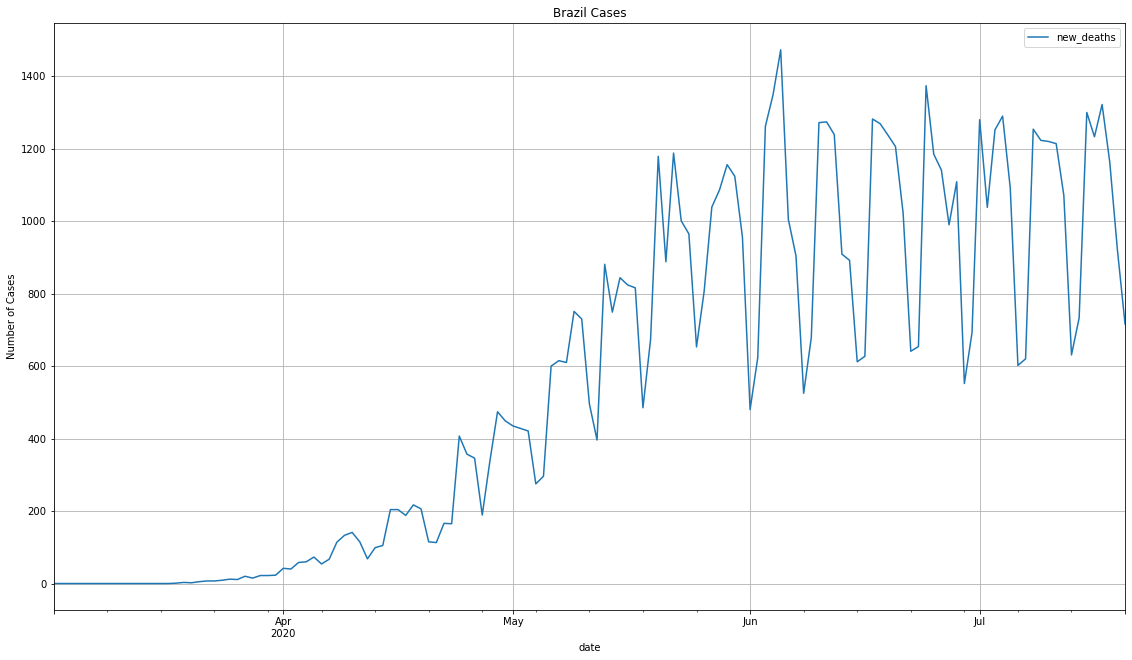

In [23]:
dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))
plt.title('Brazil Cases')
plt.ylabel('Number of Cases')
plt.grid()

In [24]:
dfBrazil = dfBrazil.loc[:,['new_deaths']]
dfBrazil = dfBrazil[
        (dfBrazil['new_deaths'] != 0)
]
dfBrazil.reset_index(drop=True, inplace=True)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler() 

In [27]:
train_size = int(len(dfBrazil)*0.6)
test_train = len(dfBrazil) - train_size
train = dfBrazil.iloc[0:train_size]
test = dfBrazil.iloc[train_size:len(dfBrazil)]

In [28]:
train = scaler.fit_transform(train)
train = pd.DataFrame(train)
train.columns = ['new_deaths']

In [29]:
test = scaler.fit_transform(test)
test = pd.DataFrame(test)
test.columns = ['new_deaths']

In [30]:
#train_size = int(len(dfBrazil)*0.6)
#test_train = len(dfBrazil) - train_size
#train = dfBrazil.iloc[0:train_size]
#test = dfBrazil.iloc[train_size:len(dfBrazil)]

In [31]:
#mean_train_x = np.mean(train, axis = 0)
#std_train_x = np.std(train.astype(np.float64), axis = 0)
#train = (train - mean_train_x)/std_train_x

In [32]:
#mean_test_x = np.mean(test, axis = 0)
#std_test_x = np.std(test.astype(np.float64), axis = 0)
#test = (test - mean_test_x)/std_test_x

In [33]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [34]:
time_steps = 2
X_train, y_train = create_dataset(train, train.new_deaths, time_steps)
X_test, y_test = create_dataset(test, test.new_deaths, time_steps)

In [35]:
model = keras.Sequential()
model.add(keras.layers.LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mse',optimizer="adam",metrics=['mse'])

In [36]:
history = model.fit(
    X_train, y_train, 
    epochs=70, 
    batch_size=1, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/70
65/65 [==============================] - 2s 35ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 2/70
65/65 [==============================] - 1s 15ms/step - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 3/70
65/65 [==============================] - 1s 14ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 4/70
65/65 [==============================] - 1s 14ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 5/70
65/65 [==============================] - 1s 13ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 6/70
65/65 [==============================] - 1s 15ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 7/70
65/65 [==============================] - 1s 13ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 8/70
65/65 [==============================] - 1s 16ms/step - loss: 0.0139 - m

65/65 [==============================] - 1s 12ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 64/70
65/65 [==============================] - 1s 15ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 65/70
65/65 [==============================] - 1s 13ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 66/70
65/65 [==============================] - 1s 17ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 67/70
65/65 [==============================] - 1s 17ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 68/70
65/65 [==============================] - 1s 14ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 69/70
65/65 [==============================] - 1s 12ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 70/70
65/65 [==============================] - 1s 14ms/step - loss: 0.0127 - mse: 

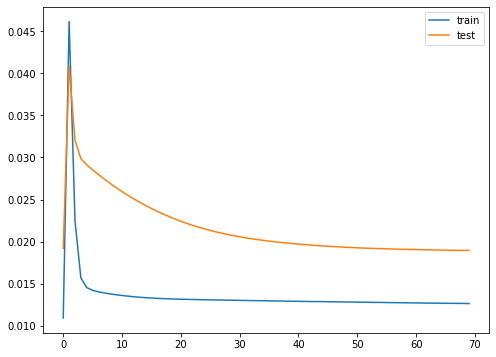

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [38]:
y_pred = model.predict(X_test)

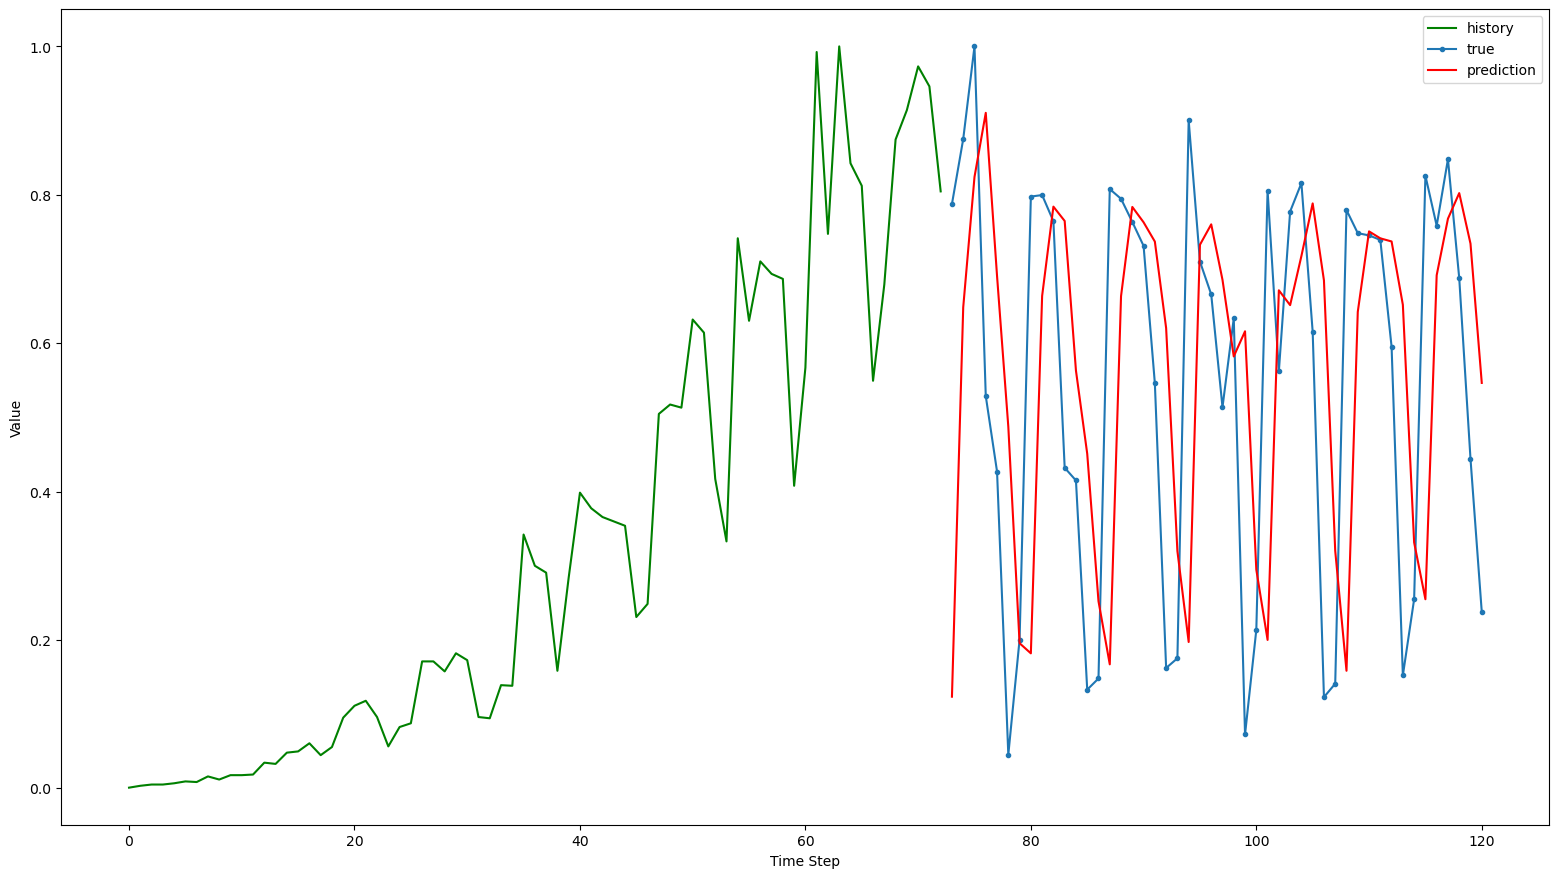

In [39]:
fig = plt.figure(figsize=(19.20,10.80),dpi=100)
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [40]:
x_train = dfBrazil.dropna()
x_train = x_train.values[:90,1:]

In [41]:
mean_vector_x = np.mean(x_train, axis = 0)
std_vector_x = np.std(x_train.astype(np.float64), axis = 0)
x_train_normalized = (x_train - mean_vector_x) / std_vector_x
x_train_normalized

array([], shape=(90, 0), dtype=float64)

In [42]:
x_test = dfBrazil.dropna()
x_test = x_test.values[90:,1:]

In [43]:
mean_vector_test = np.mean(x_test, axis = 0)
std_vector_test = np.std(x_test.astype(np.float64), axis = 0)
x_test_normalized = (x_test - mean_vector_test) / std_vector_test
x_test_normalized

array([], shape=(35, 0), dtype=float64)

### 'NAO DELETAR

In [44]:
#figLocation = go.Figure()
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.United_States, name='United States'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.Brazil, name='Brazil'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.Mexico, name='Mexico'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.United_Kingdom, name='United_Kingdom'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.Italy, name='Italy'))

#figLocation.update_traces(mode="markers+lines")
#figLocation.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))

#figLocation.show()